<h1> <b>Testes para diversos grafos <b><h1>

In [61]:
#Import do código que habilita esses testes
import Algoritmo_do_Artigo as AA
import networkx as nx
import matplotlib.pyplot as plt

<h3> Grafo de linha com 100 neurônios<h2>
<h6>Caso queira ver o gráfico com o tempo use plot = True<h6>

In [62]:
t = AA.Main(nx.path_graph(100), 1, plot=False)
print("Tempo de sobrevivencia: ", t)

Tempo de sobrevivencia:  7.483857886702995


<h3> Grafo de Erdos Renyi com probabilidade 0.03 <h3>

In [63]:
t = AA.Main(nx.erdos_renyi_graph(100, 0.05), 1, plot = False, t_up_plot=50000)
print("Tempo de sobrevivencia: ", t)

KeyboardInterrupt: 

<h3>Ligaremos dois Erdos-Renyi agora<h3>

In [64]:
G1 = nx.erdos_renyi_graph(5, 0.5)
G2 = nx.erdos_renyi_graph(5, 0.5)

print("Matriz 1:\n", nx.to_numpy_array(G1, dtype=int))
print("Matriz 2:\n", nx.to_numpy_array(G2, dtype=int))

Matriz 1:
 [[0 1 1 1 0]
 [1 0 1 0 1]
 [1 1 0 1 0]
 [1 0 1 0 0]
 [0 1 0 0 0]]
Matriz 2:
 [[0 1 1 0 0]
 [1 0 0 0 1]
 [1 0 0 1 1]
 [0 0 1 0 0]
 [0 1 1 0 0]]


In [65]:
#Chamando os nós de outros números para evitar sobreposição

mapping = {node: node + len(G1) for node in G2.nodes()}
G2 = nx.relabel_nodes(G2, mapping)

In [ ]:
#Adiciona todas as linhas da matriz
G = nx.Graph()
G.add_edges_from(G1.edges())
G.add_edges_from(G2.edges())

# Conectando a 0 (primeira de G1) com N (primeira de G2)
G.add_edge(0, len(G1)) 

print("Matriz nova:\n", nx.to_numpy_array(G, dtype=int))

Matriz nova:
 [[0 1 1 1 0 1 0 0 0 0]
 [1 0 1 0 1 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 0 1 0 0 1 1]
 [0 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 1 0 0]]


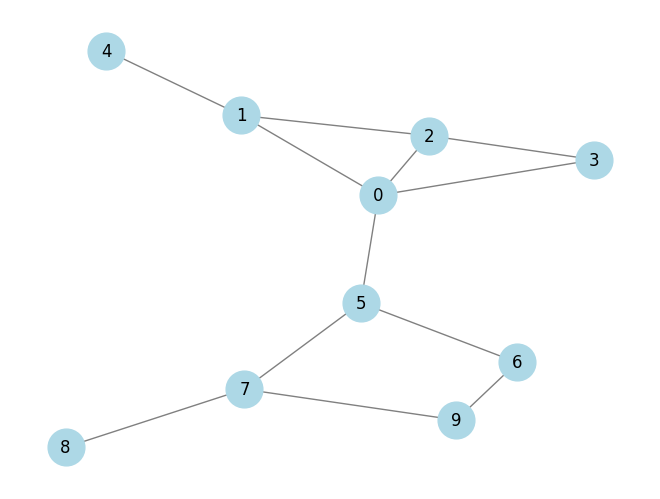

In [ ]:
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", node_size=700, font_size=12)
plt.show()

Repare que o G1 sempre terá os pontos iniciais {0, 1, 2, ..., N-1}
e G2 o resto: {N, N+1, ..., 2N-1}